The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding heree
# Store into pandas
df = pd.read_csv('data/nobel.csv')

# Check data
df.head()



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
# Cehck column names
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [4]:
# What is the most commonly awarded gender and birth country?
top_country = df.groupby('sex')['year'].count()
top_country.head()

sex
Female     65
Male      905
Name: year, dtype: int64

In [5]:
# What is the most commonly awarded gender and birth country?
country_counts = df.groupby('birth_country')['year'].count().reset_index().sort_values(by='year',ascending=False)

gender_counts = df.groupby('sex')['year'].count().reset_index().sort_values(by='year', ascending=False)

top_gender = gender_counts.iloc[0]['sex']
top_country = country_counts.iloc[0]['birth_country']

In [6]:
# What is the common birth country of the Nobel Prize Winners
df['birth_country'].value_counts().index[0]

'United States of America'

In [7]:
# Convert year to decade
df_decade = df
df_decade['decade'] = (df_decade['year'] // 10) * 10
print(df)

     year    category  ... death_country decade
0    1901   Chemistry  ...       Germany   1900
1    1901  Literature  ...        France   1900
2    1901    Medicine  ...       Germany   1900
3    1901       Peace  ...   Switzerland   1900
4    1901       Peace  ...        France   1900
..    ...         ...  ...           ...    ...
995  2023   Chemistry  ...           NaN   2020
996  2023   Chemistry  ...           NaN   2020
997  2023  Literature  ...           NaN   2020
998  2023       Peace  ...           NaN   2020
999  2023   Economics  ...           NaN   2020

[1000 rows x 19 columns]


In [8]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories? store to max_decade_usa 
total_winners_per_year = df_decade.groupby('decade')['birth_country'].count()
total_winners_per_year.head()

decade
1900    56
1910    38
1920    54
1930    55
1940    40
Name: birth_country, dtype: int64

In [9]:
# Filter the DataFrame for US-born winners and count them per year
us_born_winners_per_year = df_decade[df_decade['birth_country'].isin(['United States of America', 'USA'])].groupby('decade')['birth_country'].count()

us_born_winners_per_year.head()

decade
1900     1
1910     3
1920     4
1930    14
1940    13
Name: birth_country, dtype: int64

In [10]:
# Calculate the ratio of US-born winners to total winners for each year
ratio_per_year = us_born_winners_per_year / total_winners_per_year
print(ratio_per_year)

decade
1900    0.017857
1910    0.078947
1920    0.074074
1930    0.254545
1940    0.325000
1950    0.295775
1960    0.280000
1970    0.320388
1980    0.329787
1990    0.415842
2000    0.436975
2010    0.333333
2020    0.391304
Name: birth_country, dtype: float64


In [11]:
# Find the year with the maximum ratio
max_decade_usa = ratio_per_year.idxmax()
print(max_decade_usa)

2000


In [12]:
# Check dtypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [13]:
# Check all values in years
df['year'].value_counts()

2001    15
2022    14
2019    14
2021    13
2002    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: year, Length: 120, dtype: int64

In [14]:
# Check all values in birthdate
df['birth_date'].value_counts()

1932-10-24    2
1930-10-10    2
1941-04-28    2
1941-07-01    2
1895-10-30    2
             ..
1928-04-06    1
1916-12-15    1
1908-01-22    1
1898-11-26    1
1946-00-00    1
Name: birth_date, Length: 949, dtype: int64

In [15]:
# Check all objects in gender
df[['decade','category']].value_counts()

decade  category  
2000    Physics       28
2010    Chemistry     27
        Physics       26
2000    Medicine      26
1960    Medicine      25
                      ..
2020    Peace          7
1910    Medicine       6
1940    Literature     6
2020    Literature     4
1960    Economics      2
Length: 72, dtype: int64

In [16]:
# Define a function to convert a year to the corresponding decade
def year_to_decade(year):
    return (year // 10) * 10

# Apply the function to the 'year' column to create a new column containing the decades
df['decade'] = df['year'].apply(year_to_decade)

# Print the first few rows to verify the conversion
print(df[['year', 'decade']].head())


   year  decade
0  1901    1900
1  1901    1900
2  1901    1900
3  1901    1900
4  1901    1900


In [17]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [18]:
# Filter sex to female only
female_filter = df[df['sex'] == 'Female']
female_filter_count = female_filter.groupby(['decade','category'])['sex'].count()
female_filter_count.head(100)


decade  category  
1900    Literature    1
        Peace         1
        Physics       1
1910    Chemistry     1
1920    Literature    2
1930    Chemistry     1
        Literature    1
        Peace         1
1940    Literature    1
        Medicine      1
        Peace         1
1960    Chemistry     1
        Literature    1
        Physics       1
1970    Medicine      1
        Peace         3
1980    Medicine      3
        Peace         1
1990    Literature    3
        Medicine      1
        Peace         3
2000    Chemistry     1
        Economics     1
        Literature    3
        Medicine      4
        Peace         2
2010    Chemistry     1
        Economics     1
        Literature    3
        Medicine      2
        Peace         5
        Physics       1
2020    Chemistry     3
        Economics     1
        Literature    2
        Medicine      1
        Peace         2
        Physics       2
Name: sex, dtype: int64

In [19]:
# all laureates count

all_laureates = df.groupby(['decade','category'])['sex'].size()
all_laureates.head(200)

decade  category  
1900    Chemistry      9
        Literature    10
        Medicine      11
        Peace         14
        Physics       13
                      ..
2020    Economics      9
        Literature     4
        Medicine       8
        Peace          7
        Physics       12
Name: sex, Length: 72, dtype: int64

In [20]:
# female ratio

female_ratio =  (female_filter_count / all_laureates)
female_ratio.head(100)

decade  category  
1900    Chemistry          NaN
        Literature    0.100000
        Medicine           NaN
        Peace         0.071429
        Physics       0.076923
                        ...   
2020    Economics     0.111111
        Literature    0.500000
        Medicine      0.125000
        Peace         0.285714
        Physics       0.166667
Name: sex, Length: 72, dtype: float64

In [21]:
# get the highest dace with the highest female ratio
max_female_dict = female_ratio.reset_index().sort_values(by=['sex','category'],ascending=[False,True]).head(1)
max_female_dict.head()

,decade,category,sex
68,2020,Literature,0.5


In [22]:
# Convert to dictionary with the desired format
max_female_dict = {
    int(row['decade']): row['category']
    for _, row in max_female_dict.iterrows()
}

# Print the result
print(max_female_dict)

{2020: 'Literature'}


In [23]:
# Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

female_filter_sory_year = female_filter.sort_values(by = 'year')
first_woman_name = female_filter_sory_year['full_name'].head(1).iloc[0]
first_woman_category = female_filter_sory_year['category'].head(1).iloc[0]

In [24]:
print(first_woman_name)

Marie Curie, née Sklodowska


In [25]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?Store the full names in a list named repeat_list.

repeat_list_count = df.groupby('full_name')['year'].count().sort_values(ascending=False)
repeat_list_names = repeat_list_count[repeat_list_count > 1]
repeat_list = repeat_list_names.index.tolist()
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']


In [26]:
# Read in the Nobel Prize data
nobel = pd.read_csv('data/nobel.csv')

# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [27]:
# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()
prop_usa_winners.head()

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


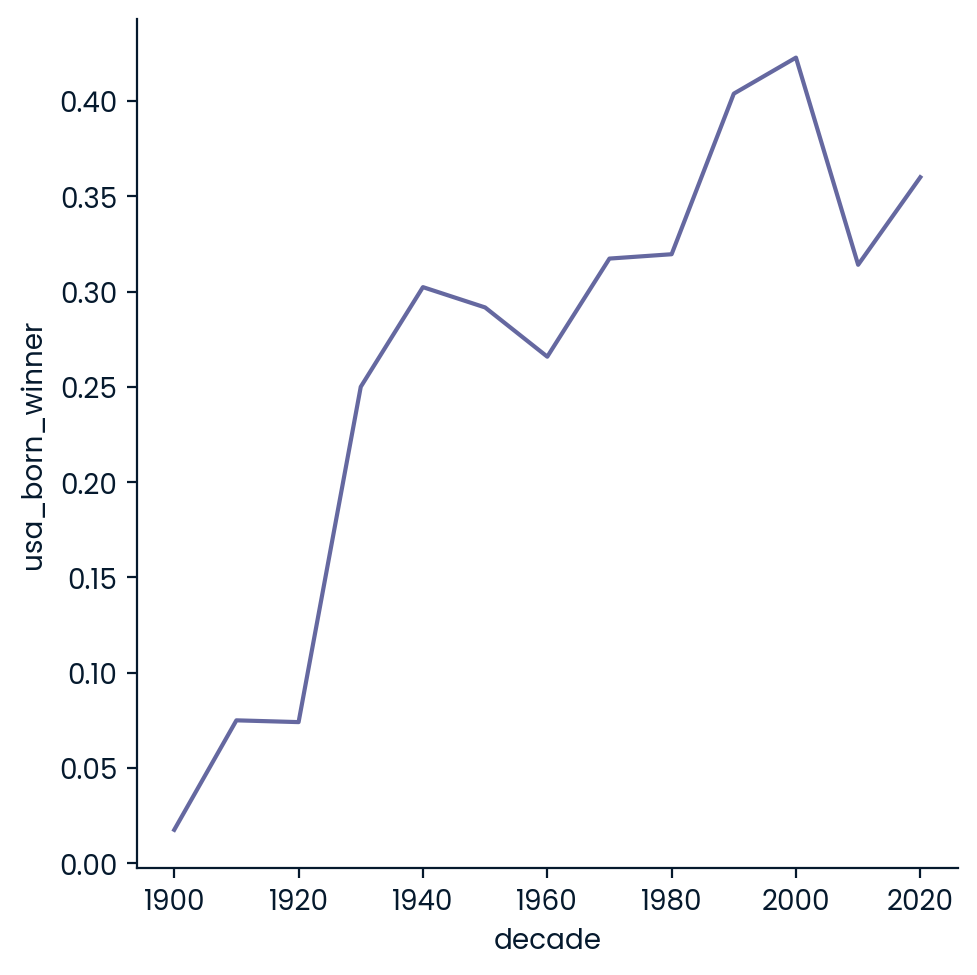

In [28]:
# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

In [29]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
nobel.head(2000)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,True,2020,False
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,False,2020,False
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,False
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True


In [30]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
print(prop_female_winners)

    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
67    2020   Economics       0.111111
68    2020  Literature       0.500000
69    2020    Medicine       0.125000
70    2020       Peace       0.285714
71    2020     Physics       0.166667

[72 rows x 3 columns]


In [31]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

In [32]:
print(max_female_decade_category)

    decade    category
68    2020  Literature


In [33]:
print(prop_female_winners['female_winner'].max())

0.5


In [34]:
print(prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()])

    decade    category  female_winner
68    2020  Literature            0.5


In [35]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

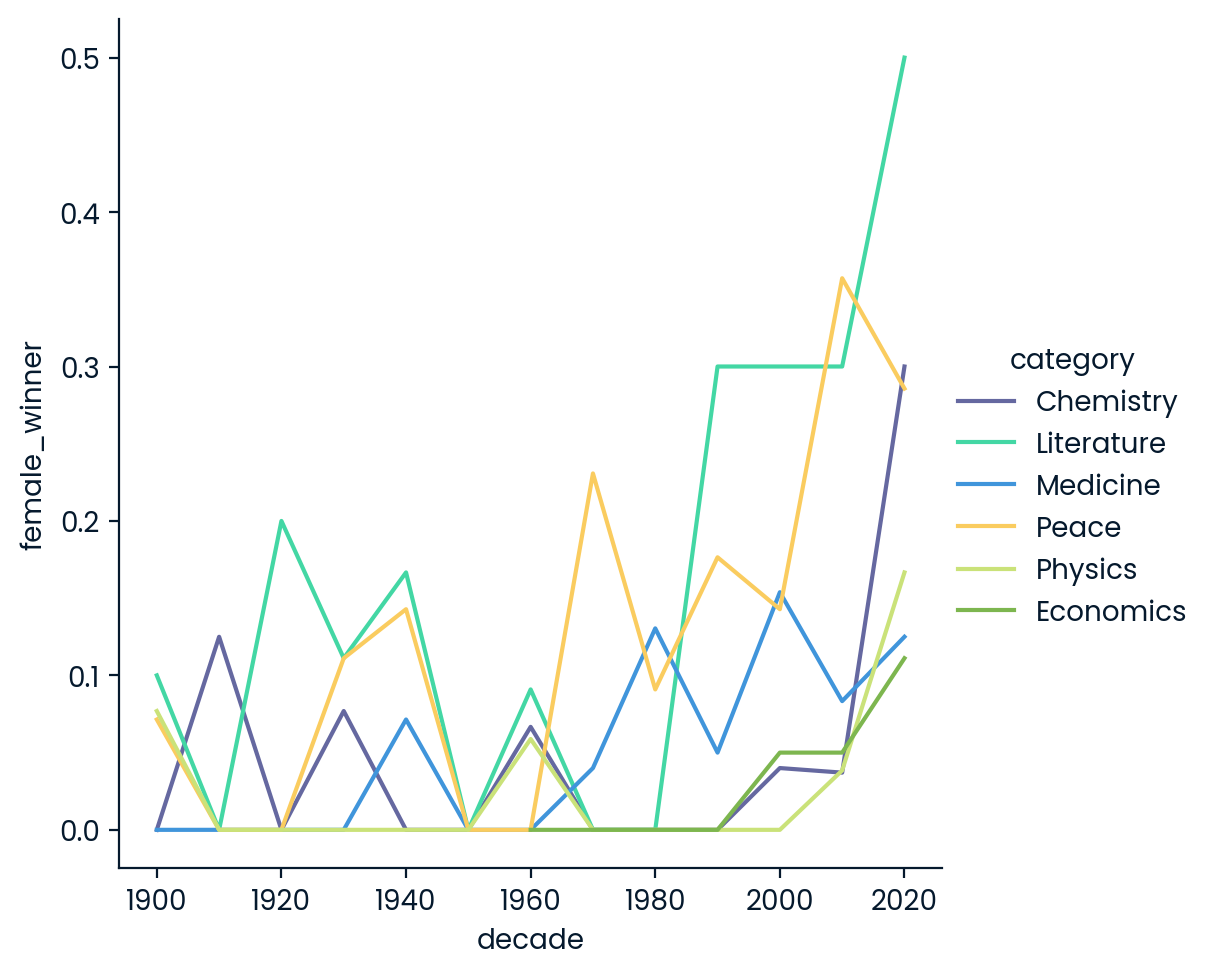

In [36]:
# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

In [38]:
# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print(counts)

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: full_name, Length: 993, dtype: int64


In [41]:
print(counts[counts >= 2])

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: full_name, dtype: int64
